In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [219]:
df=pd.read_csv('hcvdat0.csv')

In [220]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [221]:
#dropping unnamed column 
df.drop('Unnamed: 0',axis=1, inplace=True)

In [222]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [223]:
df.info()
#There are 10 missing values for CHOL, 1 for ALT, 1 for PROT, 1 for ALB and 18 for ALP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


Text(0.5, 1.0, 'Heat map of NaN Values')

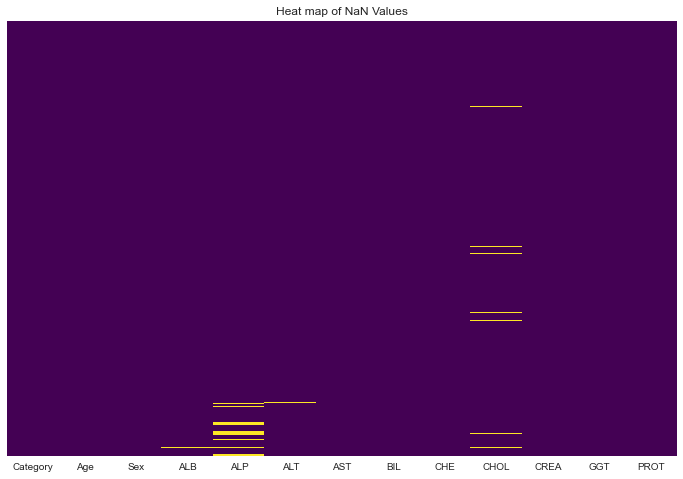

In [224]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heat map of NaN Values')

In [225]:
#finding all rows which includes missing values
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [226]:
rows_with_NaN

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,0=Blood Donor,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,0=Blood Donor,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
540,1=Hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,1=Hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,1=Hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0


In [227]:
df.corr()
#ALP has highest correlation with GGT
#CHOL has highest correlation with CHE
#I am going to use this correlations to asssign new values for NaN values

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
ALB,-0.197498,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.173340,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,-0.006021,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.088666,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.032492,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.075093,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,0.125641,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
CREA,-0.022296,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704
GGT,0.153087,-0.155749,0.454630,0.248114,0.491263,0.217024,-0.110345,-0.006895,0.121003,1.000000,-0.011767


Text(0.5, 1.0, 'Linear Regression Line for ALP and GGT')

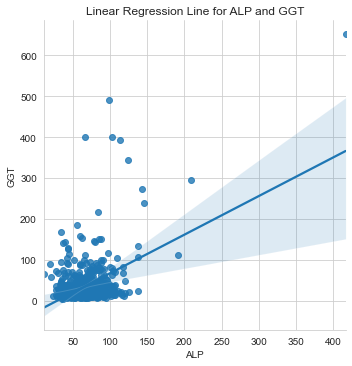

In [228]:
sns.lmplot(x='ALP',y='GGT',data=df)
plt.title('Linear Regression Line for ALP and GGT')

Text(0.5, 1.0, 'Linear Regression Line for CHOL and CHE')

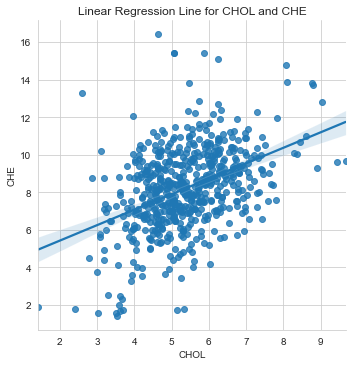

In [229]:
sns.lmplot(x='CHOL',y='CHE',data=df)
plt.title('Linear Regression Line for CHOL and CHE')

In [230]:
#function for new assignments of nan values within CHOL column
def impute_CHOL(cols):
    CHOL=cols[0]
    CHE=cols[1]
    if pd.isnull(CHOL):
        if CHE <9:
            return 10
        else:
            return 13
    else:
            return CHOL

In [231]:
df['CHOL']=df[['CHOL','CHE']].apply(impute_CHOL, axis=1)

In [232]:
#function for new assignments of nan values within ALP column
def impute_ALP(cols):
    ALP=cols[0]
    GGT=cols[1]
    if pd.isnull(ALP):
        if GGT <60:
            return 50
        else:
            return 10
    else:
            return ALP

In [233]:
df['ALP']=df[['ALP','GGT']].apply(impute_ALP, axis=1)

In [234]:
df['ALP'].isnull().values.any()

False

In [235]:
df['CHOL'].isnull().values.any()

False

In [236]:
#dropping 3 left missing values
df.dropna(inplace=True)

In [237]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [238]:
df['Sex'].value_counts()

m    374
f    238
Name: Sex, dtype: int64

In [239]:
#making dummie variables for machine learning algorithms
Sex=pd.get_dummies(df['Sex'],drop_first=True)
df=pd.concat([df,Sex],axis=1)

In [240]:
df.drop(['Sex'],axis=1,inplace=True)

In [241]:
df2 = df.set_axis(['Category','Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
                   'PROT', 'Male'],axis=1, inplace=True)

In [242]:
df['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                28
1=Hepatitis                23
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

Text(0.5, 1.0, 'All Category Counts')

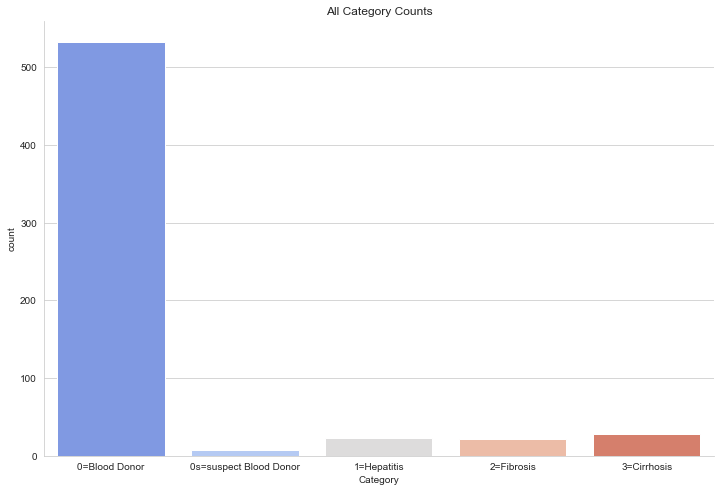

In [243]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='Category', data=df, palette='coolwarm')
sns.despine()
plt.title('All Category Counts')

In [244]:
#making dummie variables for category column
Category=pd.get_dummies(df['Category'])
df=pd.concat([df,Category],axis=1)
df.drop(['Category'],axis=1,inplace=True)

In [245]:
df.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Male,0=Blood Donor,0s=suspect Blood Donor,1=Hepatitis,2=Fibrosis,3=Cirrhosis
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,1,0,0,0,0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,1,0,0,0,0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,1,0,0,0,0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,1,0,0,0,0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,1,0,0,0,0


In [246]:
#renaming all columns respectively
df2 = df.set_axis(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
                   'PROT', 'Male','Blood Donor' ,'Suspect Blood Donor', 'Hepatisis', 'Fibrosis',
                  'Cirrhosis'],axis=1, inplace=True)

In [247]:
df.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Male,Blood Donor,Suspect Blood Donor,Hepatisis,Fibrosis,Cirrhosis
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,1,0,0,0,0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,1,0,0,0,0
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,1,0,0,0,0
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,1,0,0,0,0
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,1,0,0,0,0


Text(0.5, 1.0, 'Pearsons Correlation Heat Map')

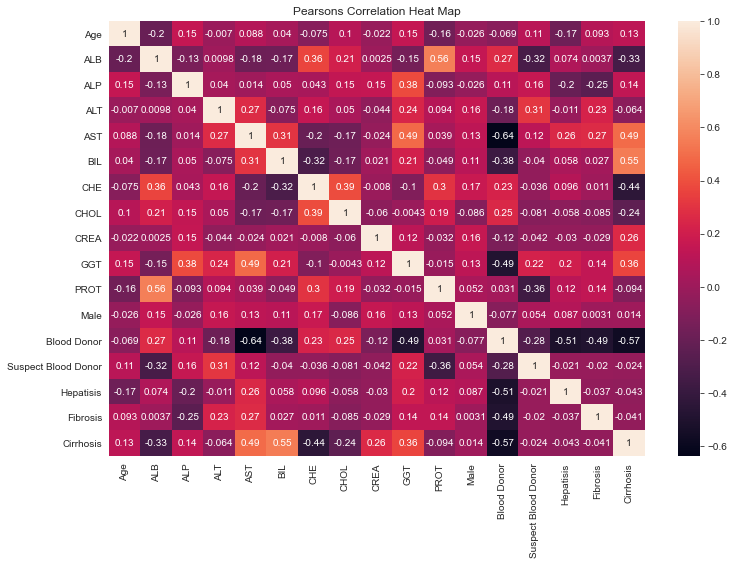

In [249]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Pearsons Correlation Heat Map')

Text(0.5, 1.0, 'Cirrhosis Patients with BIL Values According to Their Gender')

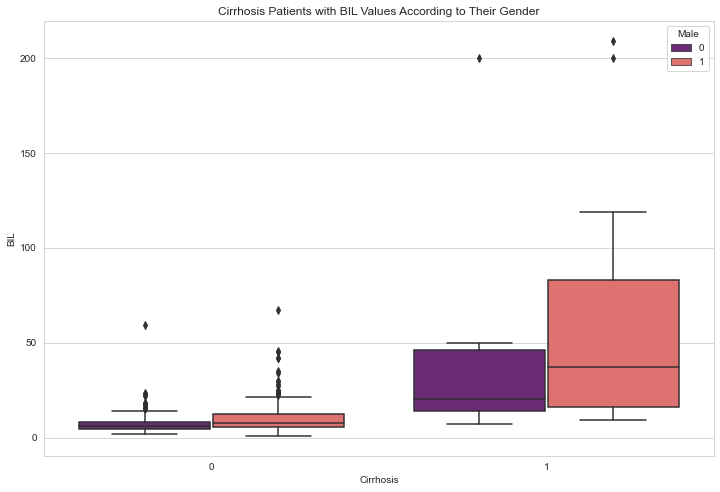

In [250]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Cirrhosis', y='BIL', data=df, hue='Male', palette='magma')
plt.title('Cirrhosis Patients with BIL Values According to Their Gender')

Text(0.5, 1.0, 'Cirrhosis Patients with AST Values According to Their Gender')

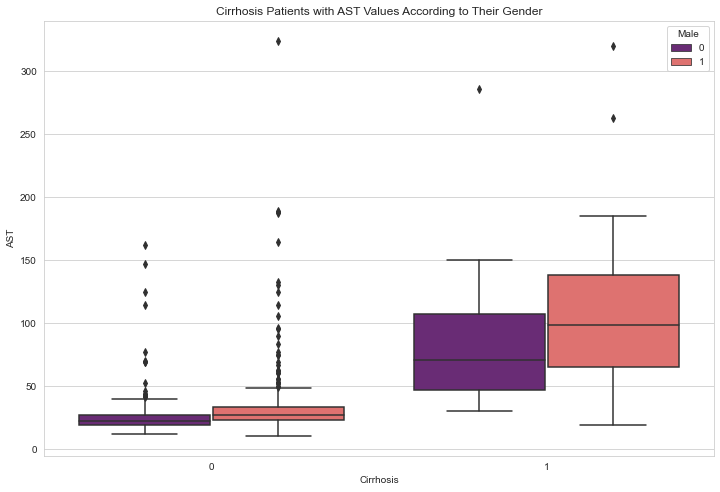

In [251]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Cirrhosis', y='AST', data=df, hue='Male', palette='magma')
plt.title('Cirrhosis Patients with AST Values According to Their Gender')

In [252]:
#fixing category colums into one class column which called blood donor
df['Not Blood Donor']=df['Suspect Blood Donor'] + df['Hepatisis'] + df['Fibrosis'] + df['Cirrhosis']

In [253]:
df.drop('Hepatisis', axis=1, inplace=True)
df.drop('Fibrosis', axis=1, inplace=True)
df.drop('Cirrhosis', axis=1, inplace=True)
df.drop('Suspect Blood Donor', axis=1, inplace=True)
df.drop('Not Blood Donor', axis=1, inplace=True)

In [254]:
df.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Male,Blood Donor
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,1
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,1
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,1
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,1
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,1


Text(0.5, 1.0, 'Age Distribution')

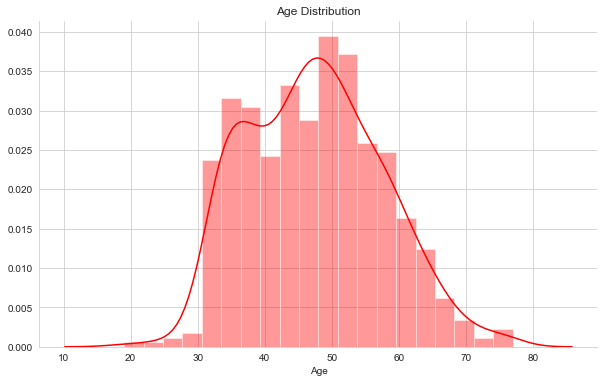

In [255]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'], bins=20, color='red')
sns.despine()
plt.title('Age Distribution')

Text(0.5, 1.0, 'Average Age for Blood Donors and Non Blood Donors')

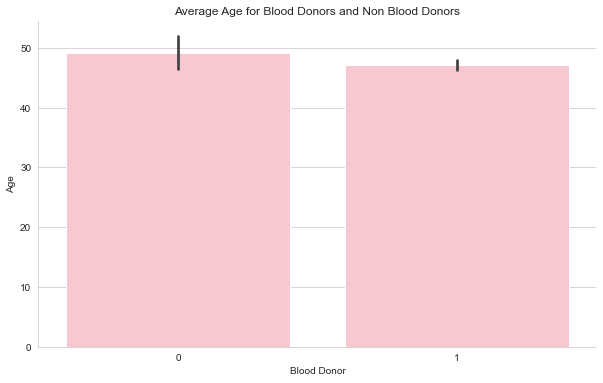

In [256]:
plt.figure(figsize=(10,6))
sns.barplot(x='Blood Donor', y='Age', data=df, color='pink')
sns.despine()
plt.title('Average Age for Blood Donors and Non Blood Donors')

Text(0.5, 1.0, 'Blood Donors Seperated by Gender')

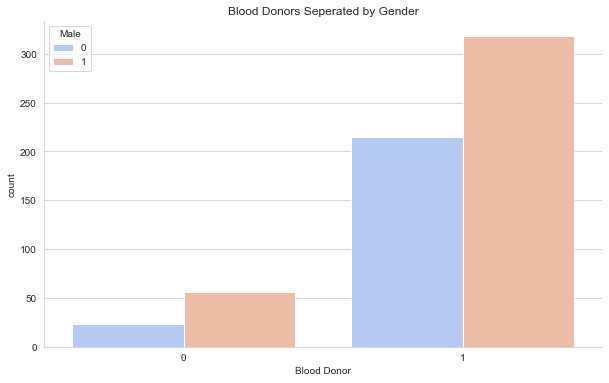

In [257]:
plt.figure(figsize=(10,6))
sns.countplot(x='Blood Donor' , data=df, hue='Male', palette='coolwarm')
sns.despine()
plt.title('Blood Donors Seperated by Gender')

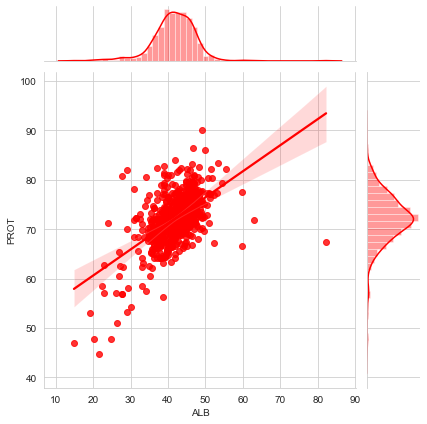

In [258]:
#making jointplots with all highly correlated attributes to eliminate them later 
sns.jointplot(x='ALB', y='PROT', data=df, kind='reg', color='red')

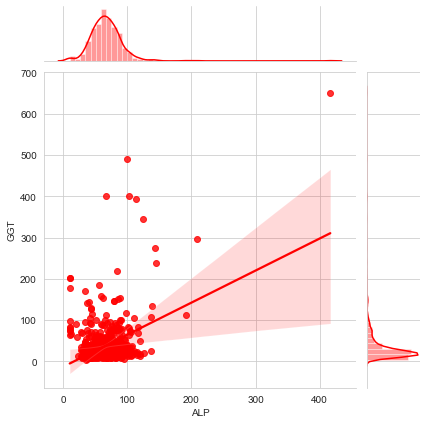

In [259]:
sns.jointplot(x='ALP', y='GGT', data=df, kind='reg', color='red')

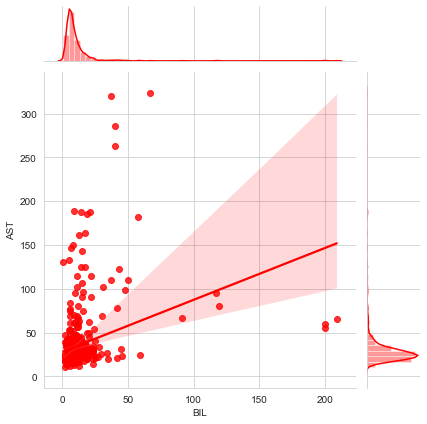

In [260]:
sns.jointplot(x='BIL', y='AST', data=df, kind='reg', color='red')

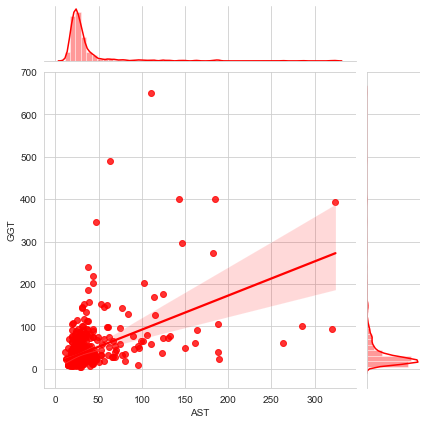

In [261]:
sns.jointplot(x='AST', y='GGT', data=df, kind='reg', color='red')

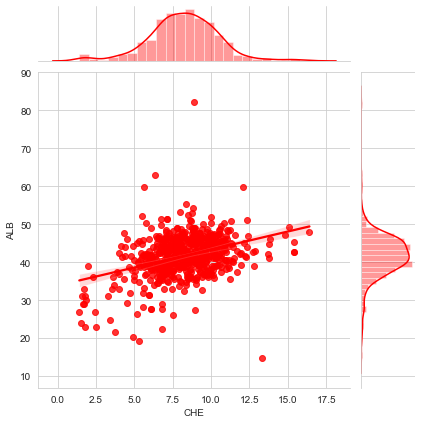

In [262]:
sns.jointplot(x='CHE', y='ALB', data=df, kind='reg', color='red')

Text(0.5, 1.0, 'Blood Donors with Their GGT Values According to Their Gender')

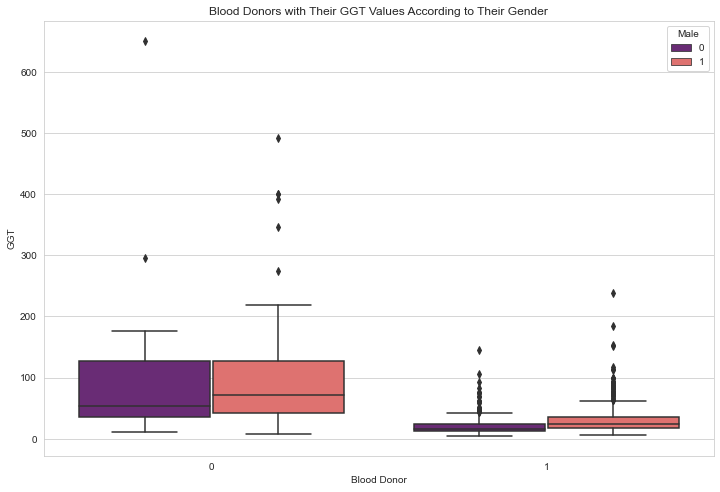

In [263]:
#GGT is the most negatively corr attribute
plt.figure(figsize=(12,8))
sns.boxplot(x='Blood Donor', y='GGT', data=df, hue='Male', palette='magma')
plt.title('Blood Donors with Their GGT Values According to Their Gender')

In [264]:
#making the split for machine learning algorithms
from sklearn.model_selection import train_test_split 
X=df.drop('Blood Donor',axis=1)
y=df['Blood Donor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [265]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)

In [266]:
from sklearn.metrics import confusion_matrix, classification_report

In [267]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 27   9]
 [  4 205]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.96      0.98      0.97       209

    accuracy                           0.95       245
   macro avg       0.91      0.87      0.89       245
weighted avg       0.95      0.95      0.95       245



In [268]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
rfc.pred=rfc.predict(X_test)

In [269]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 27   9]
 [  4 205]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.96      0.98      0.97       209

    accuracy                           0.95       245
   macro avg       0.91      0.87      0.89       245
weighted avg       0.95      0.95      0.95       245



In [270]:
#log regression
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
predictions=logmodel.predict(X_test)

/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [271]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        36
           1       0.95      0.99      0.97       209

    accuracy                           0.95       245
   macro avg       0.94      0.86      0.89       245
weighted avg       0.95      0.95      0.95       245

[[ 26  10]
 [  2 207]]


In [272]:
#scaling all values with around 0 for knn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('Blood Donor',axis=1))
scaled_features=scaler.transform(df.drop('Blood Donor',axis=1))
df_feat=pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [273]:
df_feat.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Male
0,-1.533722,-0.550964,-0.552220,-0.812461,-0.379878,-0.205131,-0.582446,-1.686417,0.496645,-0.498726,-0.565687,0.797724
1,-1.533722,-0.550964,0.114764,-0.407746,-0.301052,-0.415827,1.352217,-0.489631,-0.145698,-0.434542,0.826465,0.797724
2,-1.533722,0.918274,0.279637,0.307382,0.544813,-0.287068,0.289065,-0.184717,0.095181,-0.111786,1.346202,0.797724
3,-1.533722,0.271109,-0.570956,0.087343,-0.364719,0.462075,-0.399931,-0.535368,-0.025259,-0.100783,0.677969,0.797724
4,-1.533722,-0.428528,0.257154,0.165928,-0.298020,-0.082224,0.430514,-0.855527,-0.105552,-0.172303,-0.621373,0.797724


In [274]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
pred=logmodel.predict(X_test)

In [275]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        36
           1       0.95      0.99      0.97       209

    accuracy                           0.95       245
   macro avg       0.94      0.86      0.89       245
weighted avg       0.95      0.95      0.95       245

[[ 26  10]
 [  2 207]]


In [276]:
#finding error rate to determine best K value
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

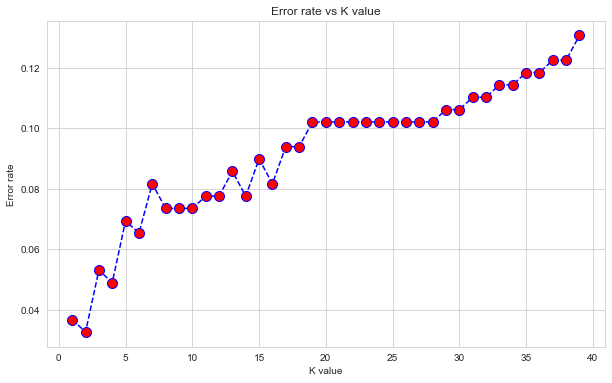

In [277]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K value')
plt.ylabel('Error rate')

In [278]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred=logmodel.predict(X_test)

In [279]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        36
           1       0.95      0.99      0.97       209

    accuracy                           0.95       245
   macro avg       0.94      0.86      0.89       245
weighted avg       0.95      0.95      0.95       245

[[ 26  10]
 [  2 207]]


In [280]:
#support vector machines
from sklearn.svm import SVC
model=SVC()
model.fit(X_train, y_train)
predictions=model.predict(X_test)

In [281]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        36
           1       0.95      1.00      0.97       209

    accuracy                           0.96       245
   macro avg       0.97      0.85      0.90       245
weighted avg       0.96      0.96      0.95       245

[[ 25  11]
 [  0 209]]


In [282]:
#making grid search to finding best parameters for SVM
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid=GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [283]:
grid.best_estimator_

SVC(C=1, gamma=0.001)

In [284]:
grid_predictions=grid.predict(X_test)

In [285]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        36
           1       0.95      1.00      0.97       209

    accuracy                           0.96       245
   macro avg       0.97      0.85      0.90       245
weighted avg       0.96      0.96      0.95       245

[[ 25  11]
 [  0 209]]


In [287]:
#FEATURE SELECTION

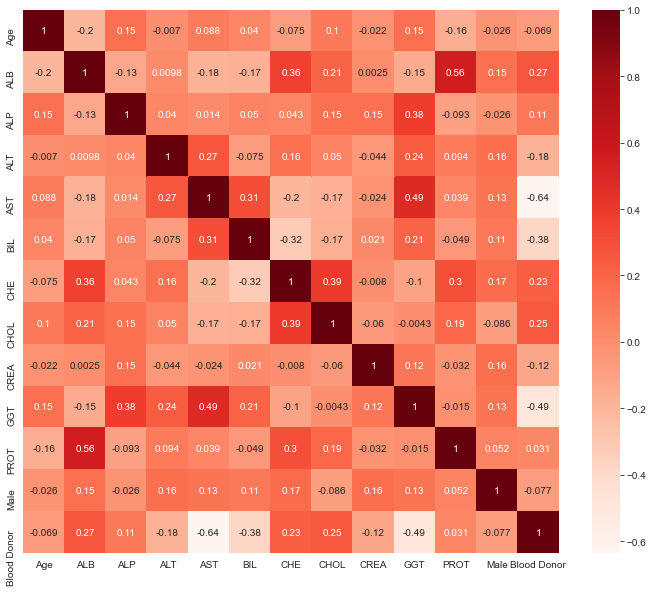

In [286]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [289]:
#Correlation with output variable
cor_target = abs(cor["Blood Donor"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

AST            0.636353
GGT            0.488670
Blood Donor    1.000000
Name: Blood Donor, dtype: float64

In [290]:
#decision tree with selected attributes from correlation 
X=df[['AST', 'GGT']]
y=df['Blood Donor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 25  11]
 [  8 201]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.95      0.96      0.95       209

    accuracy                           0.92       245
   macro avg       0.85      0.83      0.84       245
weighted avg       0.92      0.92      0.92       245



In [291]:
# random forest with selected attributes from correlation
rfc=RandomForestClassifier(n_estimators=250)
rfc.fit(X_train,y_train)
rfc.pred=rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 25  11]
 [  8 201]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.95      0.96      0.95       209

    accuracy                           0.92       245
   macro avg       0.85      0.83      0.84       245
weighted avg       0.92      0.92      0.92       245



In [292]:
#embedded method for feature selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " 
      +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 0.008935
Best score using built-in LassoCV: 0.446735
Lasso picked 2 variables and eliminated the other 0 variables


/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent_gram(
/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning

Text(0.5, 1.0, 'Feature importance using Lasso Model')

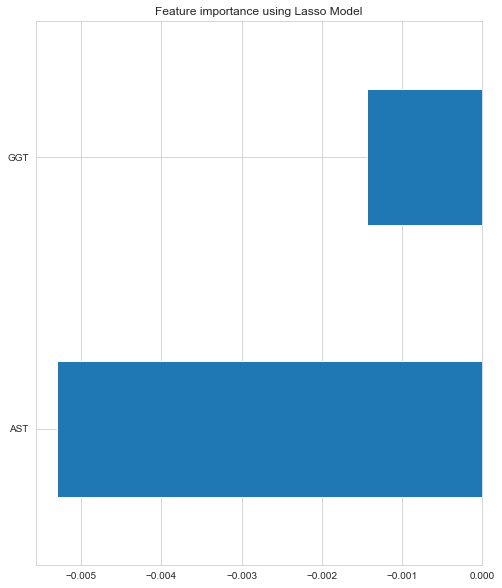

In [293]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [294]:
#SVM with attributes choosen from Lasso Model
X=df[['AST','GGT', 'BIL']]
y=df['Blood Donor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model=SVC()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 17  19]
 [  1 208]]
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        36
           1       0.92      1.00      0.95       209

    accuracy                           0.92       245
   macro avg       0.93      0.73      0.79       245
weighted avg       0.92      0.92      0.91       245



In [295]:
#backward elimination method with p-values
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const    4.089092e-314
AST       2.967638e-37
GGT       1.417229e-10
BIL       2.969483e-09
dtype: float64

In [296]:
#determining attributes with small p-values
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['AST', 'GGT', 'BIL']


In [297]:
#decision tree with attributes choosen from backward elimination
X=df[['ALB', 'ALP', 'AST', 'BIL', 'CHOL', 'CREA', 'GGT']]
y=df['Blood Donor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 31   5]
 [  5 204]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.98      0.98      0.98       209

    accuracy                           0.96       245
   macro avg       0.92      0.92      0.92       245
weighted avg       0.96      0.96      0.96       245



In [298]:
# random forest with attributes choosen from backward elimination
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
rfc.pred=rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 31   5]
 [  5 204]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.98      0.98      0.98       209

    accuracy                           0.96       245
   macro avg       0.92      0.92      0.92       245
weighted avg       0.96      0.96      0.96       245



In [299]:
#logistic regression with attributes choosen from backward elimination
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
predictions=logmodel.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 27   9]
 [  1 208]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84        36
           1       0.96      1.00      0.98       209

    accuracy                           0.96       245
   macro avg       0.96      0.87      0.91       245
weighted avg       0.96      0.96      0.96       245



In [300]:
#SVM with attributes choosen from backward elimination
model=SVC()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 27   9]
 [  0 209]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        36
           1       0.96      1.00      0.98       209

    accuracy                           0.96       245
   macro avg       0.98      0.88      0.92       245
weighted avg       0.96      0.96      0.96       245



In [301]:
#RFE (Recursive Feature Elimination)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [302]:
#Find the optimum number of features, for which the accuracy is the highest. 
#We do that by using loop starting with 1 feature and going up to 13.
#We then take the one for which the accuracy is highest.
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.489652


/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_feat

In [303]:
#final set of features given by RFE method
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 6)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['ALB', 'ALP', 'AST', 'BIL', 'CHOL', 'GGT'], dtype='object')


/Users/isikgurhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [304]:
#decision tree with attributes choosen from rfe method
X=df[['ALB', 'ALP', 'AST', 'BIL', 'CHOL', 'GGT']]
y=df['Blood Donor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 31   5]
 [  6 203]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        36
           1       0.98      0.97      0.97       209

    accuracy                           0.96       245
   macro avg       0.91      0.92      0.91       245
weighted avg       0.96      0.96      0.96       245



In [305]:
# random forest with attributes choosen from rfe method
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
rfc.pred=rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 31   5]
 [  6 203]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        36
           1       0.98      0.97      0.97       209

    accuracy                           0.96       245
   macro avg       0.91      0.92      0.91       245
weighted avg       0.96      0.96      0.96       245



In [306]:
#logistic regression with attributes choosen from rfe method
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
predictions=logmodel.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 25  11]
 [  1 208]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.81        36
           1       0.95      1.00      0.97       209

    accuracy                           0.95       245
   macro avg       0.96      0.84      0.89       245
weighted avg       0.95      0.95      0.95       245



In [308]:
#finding pca components
scaler=StandardScaler()
scaler.fit(df.drop('Blood Donor',axis=1))
scaled_features=scaler.transform(df.drop('Blood Donor',axis=1))
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_features)
X_pca=pca.transform(scaled_features)

In [310]:
X_pca.shape

(612, 2)

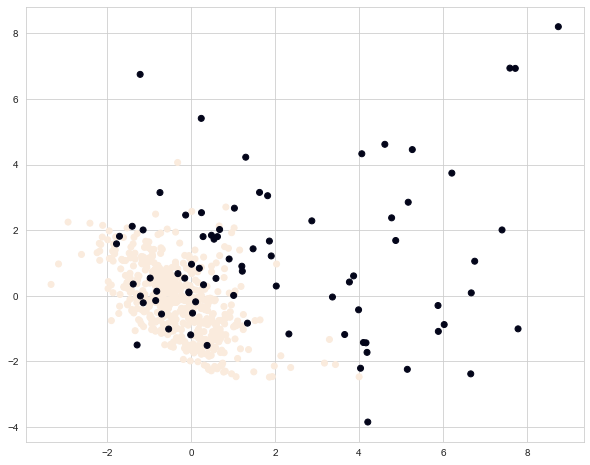

In [311]:
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Blood Donor'])

In [312]:
pca.components_

array([[ 0.18863319, -0.45646386,  0.15211414,  0.02197414,  0.34808174,
         0.33387135, -0.42732896, -0.29182301,  0.06074601,  0.32432636,
        -0.3508792 , -0.0064136 ],
       [ 0.04865504,  0.20937844,  0.25216222,  0.42456971,  0.37292479,
         0.08267877,  0.2701861 ,  0.18881195,  0.11943792,  0.48172353,
         0.31205391,  0.33419808]])

In [313]:
#how much variation did they explained
pca.explained_variance_ratio_

array([0.20008906, 0.15257601])